# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from pathlib import Path
from newsapi import NewsApiClient

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\bmccr\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Check to make sure your .env is loaded
load_dotenv()

True

In [3]:
# Read your api key environment variable
news_api_key = os.getenv("NEWS_API")
type(news_api_key)

str

In [4]:
# Create a newsapi client
newsapi = NewsApiClient(api_key = news_api_key)

In [5]:
# Fetch the Bitcoin news articles
btc_art = newsapi.get_everything(q = "Bitcoin", language = "en")
btc_art

{'status': 'ok',
 'totalResults': 8981,
 'articles': [{'source': {'id': 'mashable', 'name': 'Mashable'},
   'author': 'Stan Schroeder',
   'title': 'Elon Musk says Tesla will resume Bitcoin purchases when Bitcoin gets greener',
   'description': "It's all about clean energy, it seems.\xa0\nElon Musk and Tesla caused ripples in the cryptocurrency market in the past few months, first by announcing that Tesla had bought $1.5 billion worth of bitcoins and that it will start accepting Bitcoin for purchases, an…",
   'url': 'https://mashable.com/article/tesla-bitcoin-purchases-green/',
   'urlToImage': 'https://mondrian.mashable.com/2021%252F06%252F14%252Fcc%252Faf6b974e89a64972a334f8675f5dc80a.36e5a.jpg%252F1200x630.jpg?signature=XiWTfhyod6_Xl2i4nyhER_1xCXQ=',
   'publishedAt': '2021-06-14T07:15:49Z',
   'content': "It's all about clean energy, it seems.\xa0\r\nElon Musk and Tesla caused ripples in the cryptocurrency market in the past few months, first by announcing that Tesla had bought $

In [6]:
# Fetch the Ethereum news articles
eth_art = newsapi.get_everything(q = "Ethereum", language = "en")
eth_art

{'status': 'ok',
 'totalResults': 2368,
 'articles': [{'source': {'id': 'mashable', 'name': 'Mashable'},
   'author': 'Joseph Green',
   'title': 'This blockchain development course bundle is on sale for 97% off',
   'description': 'TL;DR: The Cryptocurrency with Ethereum and Solidity Blockchain Developer Bundle is on sale for £21.25 as of June 17, saving you 97% on list price.\n\nIs everyone you know investing in cryptocurrency? The Cryptocurrency with Ethereum and Solidity Blockchain Dev…',
   'url': 'https://mashable.com/uk/shopping/june-17-cryptocurrency-ethereum-and-solidity-blockchain-developer-bundle/',
   'urlToImage': 'https://mondrian.mashable.com/2021%252F06%252F17%252Fa4%252Fd95c8d39ee014266beea8c6b9d053d19.1c765.jpg%252F1200x630.jpg?signature=13rMcdTv3FsupfDx5m8coAhsN-4=',
   'publishedAt': '2021-06-17T04:05:00Z',
   'content': 'TL;DR: The Cryptocurrency with Ethereum and Solidity Blockchain Developer Bundle is on sale for £21.25 as of June 17, saving you 97% on list price

In [7]:
# Create function that will get sentiments of articles from newsapi
# Create the Bitcoin sentiment scores DataFrame
def get_sentiments(article):
    sentiments = []
    for x in article["articles"]:
        title = x["title"]
        text = x["content"]
        date = x["publishedAt"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        positive = sentiment["pos"]
        neutral = sentiment["neu"]
        negative = sentiment["neg"]
        sentiments.append({
            "Title": title,
            "Text": text,
            "Date": date,
            "Compound": compound,
            "Positive": positive,
            "Neutral": neutral,
            "Negative": negative,
        })
            
    return pd.DataFrame(sentiments)

btc_sentiments = get_sentiments(btc_art)
btc_sentiments.head()

,Title,Text,Date,Compound,Positive,Neutral,Negative
0,Elon Musk says Tesla will resume Bitcoin purch...,"It's all about clean energy, it seems. \r\nElo...",2021-06-14T07:15:49Z,0.6908,0.169,0.831,0.000
1,Kaseya ransomware attackers demand $70 million...,Filed under:\r\nThe supply chain attack has re...,2021-07-05T19:45:10Z,-0.5719,0.111,0.705,0.184
2,Miami's Bitcoin Conference May Be the Latest C...,"Several crypto fans that descended on Miami, F...",2021-06-11T00:45:00Z,0.5574,0.107,0.893,0.000
3,Gang behind huge cyber-attack demands $70m in ...,image copyrightGetty Images\r\nThe gang behind...,2021-07-05T12:14:34Z,-0.6124,0.000,0.857,0.143
4,"El Salvador to keep dollar as legal tender, se...","SAN SALVADOR, June 16 (Reuters) - El Salvador ...",2021-06-16T17:34:00Z,0.1280,0.043,0.957,0.000


In [8]:
# Create the Ethereum sentiment scores DataFrame
eth_sentiments = get_sentiments(eth_art)
eth_sentiments.head()

,Title,Text,Date,Compound,Positive,Neutral,Negative
0,This blockchain development course bundle is o...,TL;DR: The Cryptocurrency with Ethereum and So...,2021-06-17T04:05:00Z,0.0000,0.000,1.000,0.000
1,Classic memes that have sold as NFTs,It wasn't long ago that your average person ha...,2021-06-20T19:28:07Z,-0.2960,0.000,0.939,0.061
2,Ethereum creator Vitalik Buterin made more tha...,This article was translated from our Spanish e...,2021-06-10T19:12:00Z,-0.3400,0.000,0.934,0.066
3,Ethereum now has more active addresses than bi...,Bitcoin and Ethereum\r\nYuriko Nakao\r\nEther ...,2021-07-02T15:49:56Z,0.3612,0.110,0.849,0.041
4,More than $13 billion worth of ether has been ...,"Ether holders have ""staked"" more than $13 bill...",2021-07-05T12:54:02Z,0.7717,0.194,0.806,0.000


In [9]:
# Describe the Bitcoin Sentiment
btc_sentiments.describe()

,Compound,Positive,Neutral,Negative
count,20.000000,20.000000,20.00000,20.000000
mean,-0.002110,0.052450,0.90325,0.044250
std,0.360928,0.055833,0.07589,0.053716
min,-0.612400,0.000000,0.70500,0.000000
25%,-0.300350,0.000000,0.85225,0.000000
50%,0.000000,0.044000,0.92000,0.028500
75%,0.202300,0.105500,0.95550,0.075500
max,0.690800,0.169000,1.00000,0.184000


In [10]:
# Describe the Ethereum Sentiment
eth_sentiments.describe()

,Compound,Positive,Neutral,Negative
count,20.000000,20.000000,20.000000,20.000000
mean,0.058045,0.040500,0.933450,0.026050
std,0.362310,0.058708,0.053222,0.033651
min,-0.381800,0.000000,0.806000,0.000000
25%,-0.278900,0.000000,0.920000,0.000000
50%,0.000000,0.000000,0.934500,0.000000
75%,0.361200,0.074750,0.961000,0.060250
max,0.771700,0.194000,1.000000,0.080000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin

Q: Which coin had the highest compound score?

A: Ethereum

Q. Which coin had the highest positive score?

A: Ethereum

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [11]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [12]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
stopwords = set(stopwords.words("english"))

# Expand the default stopwords list if necessary
expanded_stopwords = {"char", "el"}
stopwords = stopwords.union(expanded_stopwords)

In [13]:
# Tokenizes Text from DataFrame
def tokenizer(text):
    regex = re.compile("[^a-zA-Z0-9]")
    text['Tokens'] = ""

    for i in range(len(text)):
        
        # Remove the punctuation from text
        clean = regex.sub(" ", text['Text'].loc[i])
        
        # Tokenizes text
        words = word_tokenize(clean)
        
        # Convert the words to lowercase & Remove the stop words
        words_lower = [x.lower() for x in words if x.lower() not in stopwords]
        
        # Lemmatize words into root words
        words_lemmatized = [lemmatizer.lemmatize(x) for x in words_lower]
        text['Tokens'][i] = words_lemmatized
    
    return text

In [14]:
# Create a new tokens column for Bitcoin
btc_art_tokenized = tokenizer(btc_sentiments)
btc_art_tokenized.head()

<ipython-input-13-9f062c117913>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text['Tokens'][i] = words_lemmatized


,Title,Text,Date,Compound,Positive,Neutral,Negative,Tokens
0,Elon Musk says Tesla will resume Bitcoin purch...,"It's all about clean energy, it seems. \r\nElo...",2021-06-14T07:15:49Z,0.6908,0.169,0.831,0.000,"[clean, energy, seems, elon, musk, tesla, caus..."
1,Kaseya ransomware attackers demand $70 million...,Filed under:\r\nThe supply chain attack has re...,2021-07-05T19:45:10Z,-0.5719,0.111,0.705,0.184,"[filed, supply, chain, attack, reached, thousa..."
2,Miami's Bitcoin Conference May Be the Latest C...,"Several crypto fans that descended on Miami, F...",2021-06-11T00:45:00Z,0.5574,0.107,0.893,0.000,"[several, crypto, fan, descended, miami, flori..."
3,Gang behind huge cyber-attack demands $70m in ...,image copyrightGetty Images\r\nThe gang behind...,2021-07-05T12:14:34Z,-0.6124,0.000,0.857,0.143,"[image, copyrightgetty, image, gang, behind, c..."
4,"El Salvador to keep dollar as legal tender, se...","SAN SALVADOR, June 16 (Reuters) - El Salvador ...",2021-06-16T17:34:00Z,0.1280,0.043,0.957,0.000,"[san, salvador, june, 16, reuters, salvador, r..."


In [15]:
# Create a new tokens column for Ethereum
eth_art_tokenized = tokenizer(eth_sentiments)
eth_art_tokenized.head()

<ipython-input-13-9f062c117913>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text['Tokens'][i] = words_lemmatized


,Title,Text,Date,Compound,Positive,Neutral,Negative,Tokens
0,This blockchain development course bundle is o...,TL;DR: The Cryptocurrency with Ethereum and So...,2021-06-17T04:05:00Z,0.0000,0.000,1.000,0.000,"[tl, dr, cryptocurrency, ethereum, solidity, b..."
1,Classic memes that have sold as NFTs,It wasn't long ago that your average person ha...,2021-06-20T19:28:07Z,-0.2960,0.000,0.939,0.061,"[long, ago, average, person, clue, nft, nowada..."
2,Ethereum creator Vitalik Buterin made more tha...,This article was translated from our Spanish e...,2021-06-10T19:12:00Z,-0.3400,0.000,0.934,0.066,"[article, translated, spanish, edition, using,..."
3,Ethereum now has more active addresses than bi...,Bitcoin and Ethereum\r\nYuriko Nakao\r\nEther ...,2021-07-02T15:49:56Z,0.3612,0.110,0.849,0.041,"[bitcoin, ethereum, yuriko, nakao, ether, over..."
4,More than $13 billion worth of ether has been ...,"Ether holders have ""staked"" more than $13 bill...",2021-07-05T12:54:02Z,0.7717,0.194,0.806,0.000,"[ether, holder, staked, 13, billion, worth, cr..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [16]:
from collections import Counter
from nltk import ngrams

In [17]:
# Generate the Bitcoin N-grams where N=2
btc_tokens = []
[btc_tokens.append(btc_art_tokenized["Tokens"][x]) for x in range(len(btc_art_tokenized))]
btc_tokens = [item for sublist in btc_tokens for item in sublist if item not in stopwords]
btc_ngrams = Counter(ngrams(btc_tokens, n = 2))
btc_ngrams

Counter({('clean', 'energy'): 1,
         ('energy', 'seems'): 1,
         ('seems', 'elon'): 1,
         ('elon', 'musk'): 1,
         ('musk', 'tesla'): 1,
         ('tesla', 'caused'): 1,
         ('caused', 'ripple'): 1,
         ('ripple', 'cryptocurrency'): 1,
         ('cryptocurrency', 'market'): 1,
         ('market', 'past'): 1,
         ('past', 'month'): 1,
         ('month', 'first'): 1,
         ('first', 'announcing'): 1,
         ('announcing', 'tesla'): 1,
         ('tesla', 'bought'): 1,
         ('bought', '1'): 1,
         ('1', '5'): 1,
         ('5', 'billion'): 1,
         ('billion', 'worth'): 1,
         ('worth', 'bitcoi'): 1,
         ('bitcoi', '2508'): 1,
         ('2508', 'filed'): 1,
         ('filed', 'supply'): 1,
         ('supply', 'chain'): 1,
         ('chain', 'attack'): 1,
         ('attack', 'reached'): 1,
         ('reached', 'thousand'): 1,
         ('thousand', 'organization'): 1,
         ('organization', 'illustration'): 1,
         ('illust

In [18]:
# Generate the Ethereum N-grams where N=2
eth_tokens = []
[eth_tokens.append(eth_art_tokenized["Tokens"][x]) for x in range(len(eth_art_tokenized))]
eth_tokens = [item for sublist in eth_tokens for item in sublist if item not in stopwords]
eth_ngrams = Counter(ngrams(eth_tokens, n = 2))
eth_ngrams

Counter({('tl', 'dr'): 1,
         ('dr', 'cryptocurrency'): 1,
         ('cryptocurrency', 'ethereum'): 5,
         ('ethereum', 'solidity'): 2,
         ('solidity', 'blockchain'): 2,
         ('blockchain', 'developer'): 2,
         ('developer', 'bundle'): 2,
         ('bundle', 'sale'): 1,
         ('sale', '21'): 1,
         ('21', '25'): 1,
         ('25', 'june'): 1,
         ('june', '17'): 1,
         ('17', 'saving'): 1,
         ('saving', '97'): 1,
         ('97', 'list'): 1,
         ('list', 'price'): 1,
         ('price', 'everyone'): 1,
         ('everyone', 'know'): 1,
         ('know', 'investing'): 1,
         ('investing', 'cryptocurrency'): 1,
         ('cryptocurrency', '949'): 1,
         ('949', 'long'): 1,
         ('long', 'ago'): 1,
         ('ago', 'average'): 1,
         ('average', 'person'): 1,
         ('person', 'clue'): 1,
         ('clue', 'nft'): 1,
         ('nft', 'nowadays'): 1,
         ('nowadays', 'making'): 1,
         ('making', 'headline'):

In [19]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [20]:
# Use token_count to get the top 10 words for Bitcoin
token_count(btc_tokens)

[('bitcoin', 22),
 ('reuters', 18),
 ('june', 10),
 ('cryptocurrency', 7),
 ('salvador', 6),
 ('illustration', 5),
 ('biggest', 5),
 ('monday', 5),
 ('legal', 4),
 ('tender', 4)]

In [21]:
# Use token_count to get the top 10 words for Ethereum
token_count(eth_tokens)

[('cryptocurrency', 16),
 ('bitcoin', 16),
 ('world', 11),
 ('ethereum', 8),
 ('biggest', 8),
 ('reuters', 8),
 ('network', 7),
 ('previous', 7),
 ('close', 7),
 ('best', 7)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

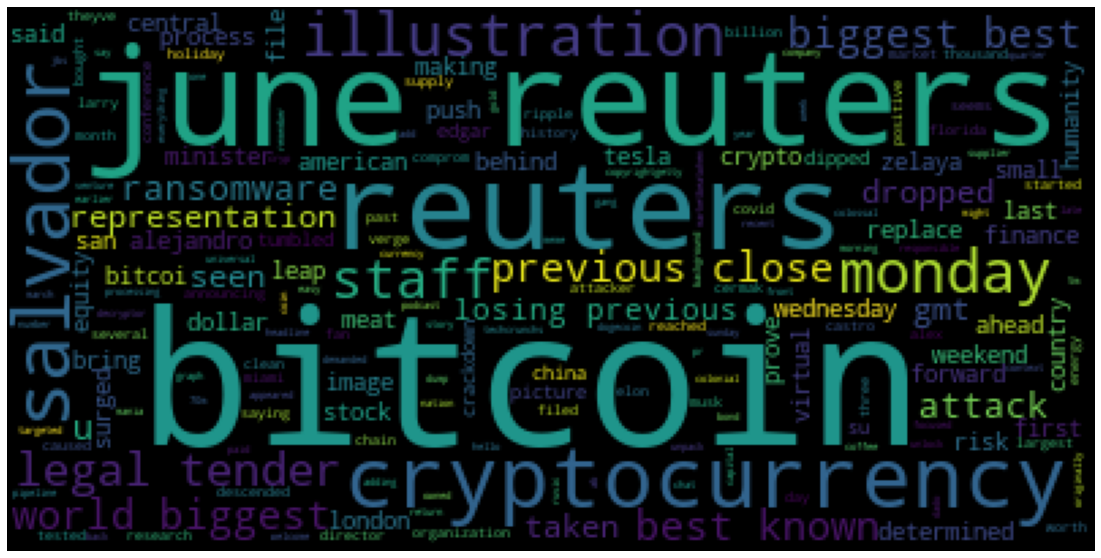

In [23]:
# Generate the Bitcoin word cloud
big_string = ' '.join(btc_tokens)
wc = WordCloud().generate(big_string)
plt.axis('off')
plt.grid(b = None)
plt.imshow(wc)
plt.savefig("../Images/bitcoin_wordcloud.png")

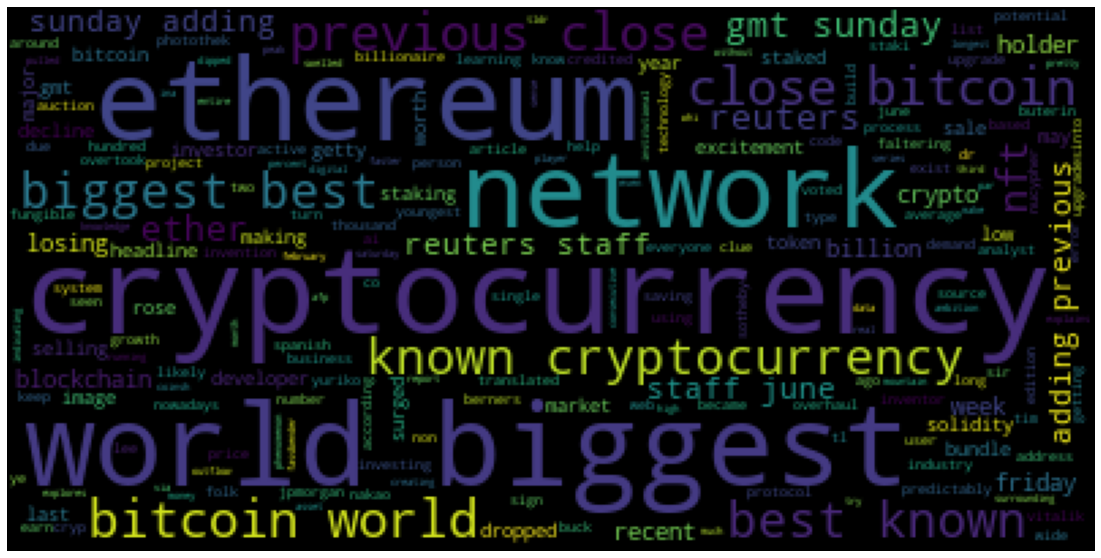

In [24]:
# Generate the Ethereum word cloud
big_string = ' '.join(eth_tokens)
wc = WordCloud().generate(big_string)
plt.axis('off')
plt.grid(b = None)
plt.imshow(wc)
plt.savefig("../Images/ethereum_wordcloud.png")

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [25]:
import spacy
from spacy import displacy

In [26]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [27]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [28]:
# Concatenate all of the Bitcoin text together
btc_concatenate = ' '.join(btc_sentiments['Text'])

In [29]:
# Run the NER processor on all of the text
btc_nlp = nlp(btc_concatenate)

# Add a title to the document
btc_nlp.user_data["title"] = "Text of Bitcoin Articles with Named Entity Recognition"

In [30]:
# Render the visualization
displacy.render(btc_nlp, style = 'ent')

In [31]:
# List all Entities
[(x.text, x.label_) for x in btc_nlp.ents]

[('Elon Musk', 'PERSON'),
 ('Tesla', 'PERSON'),
 ('the past few months', 'DATE'),
 ('first', 'ORDINAL'),
 ('Tesla', 'ORG'),
 ('$1.5 billion', 'MONEY'),
 ('Alex Castro', 'PERSON'),
 ('Verge', 'ORG'),
 ('Three days', 'DATE'),
 ('the holiday weekend', 'DATE'),
 ('Miami', 'GPE'),
 ('Florida', 'GPE'),
 ('last weekend', 'DATE'),
 ('covid-19', 'PERSON'),
 ('Larry Cermak', 'PERSON'),
 ('$70m', 'MONEY'),
 ('£50.5m', 'MONEY'),
 ('Bitcoin', 'PERSON'),
 ('June 16', 'DATE'),
 ('Reuters', 'ORG'),
 ('El Salvador', 'GPE'),
 ('U.S.', 'GPE'),
 ('Finance', 'ORG'),
 ('Alejandro Zelaya', 'PERSON'),
 ('Wednesday', 'DATE'),
 ('Central American', 'NORP'),
 ('LONDON', 'GPE'),
 ('June 23', 'DATE'),
 ('Reuters', 'ORG'),
 ('El Salvador', 'GPE'),
 ('Pr', 'PERSON'),
 ('LONDON', 'GPE'),
 ('June 23', 'DATE'),
 ('Reuters', 'ORG'),
 ('El Salvador', 'GPE'),
 ('Reuters', 'ORG'),
 ('Reuters', 'ORG'),
 ('El Salvador', 'GPE'),
 ('U.S.', 'GPE'),
 ('Finance', 'ORG'),
 ('Alejandro Zelaya', 'PERSON'),
 ('Wednesday', 'DATE'),
 (

---

### Ethereum NER

In [32]:
# Concatenate all of the Ethereum text together
eth_concatenate = ' '.join(eth_sentiments['Text'])

In [33]:
# Run the NER processor on all of the text
eth_nlp = nlp(eth_concatenate)

# Add a title to the document
eth_nlp.user_data["title"] = "Text of Ethereum Articles with Named Entity Recognition"

In [34]:
# Render the visualization
displacy.render(eth_nlp, style = 'ent')

In [35]:
# List all Entities
[(x.text, x.label_) for x in eth_nlp.ents]

[('21.25', 'MONEY'),
 ('June 17', 'DATE'),
 ('97%', 'PERCENT'),
 ('NFT', 'ORG'),
 ('hundreds of thousands', 'CARDINAL'),
 ('Spanish', 'NORP'),
 ('AI', 'ORG'),
 ('Last May', 'DATE'),
 ('Buterin', 'PERSON'),
 ('27', 'CARDINAL'),
 ('Yuriko Nakao', 'PERSON'),
 ('Friday', 'DATE'),
 ('more than $13 billion', 'MONEY'),
 ('2.0', 'CARDINAL'),
 ('Photothek/Getty Images', 'PERSON'),
 ('more than $13 billion', 'MONEY'),
 ('2.0', 'CARDINAL'),
 ('$40 billion', 'MONEY'),
 ('2025', 'DATE'),
 ('JPMorgan', 'ORG'),
 ('Tim Berners-Lee', 'PERSON'),
 ('NFT', 'ORG'),
 ("Sotheby's", 'ORG'),
 ('NFT', 'ORG'),
 ('Two', 'CARDINAL'),
 ('Keep Network', 'ORG'),
 ('Last week', 'DATE'),
 ('NFT', 'ORG'),
 ('as much as', 'CARDINAL'),
 ('90 percent', 'PERCENT'),
 ('recent weeks', 'DATE'),
 ('recent months', 'DATE'),
 ('Bitcoin', 'PERSON'),
 ('5.71%', 'PERCENT'),
 ('35,210', 'MONEY'),
 ('0600', 'CARDINAL'),
 ('GMT', 'ORG'),
 ('Saturday', 'DATE'),
 ('2,131.11', 'MONEY'),
 ('Bitcoin', 'PERSON'),
 ('45.7%', 'PERCENT'),
 ('20

---